In [51]:
%load_ext autoreload
%autoreload 2
from plotnine import ggplot,geom_rect, geom_point, aes, stat_smooth,geom_bar, xlim, ylim, facet_wrap, theme_bw,theme_xkcd, geom_line, geom_tile
from plotnine import scale_y_continuous,scale_x_continuous, theme_bw,theme_classic, theme_dark, theme_light, theme_matplotlib, theme_minimal, theme_seaborn, theme_void
import plotnine as pn
from plotnine.data import mtcars
import pandas as pd
import numpy as np
from seqplot import p9tools
from seqplot.p9tools import geom_seq_x


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from pytexshade import ipyshade
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

In [53]:
#Prepare a Multiple Sequence Alignment in biopython
human_h2a_z_core=Seq('SRSQRAGLQFPVGRIHRHLKSRTTSHGRVGATAAVYSAAILEYLTAEVLELAGNASKDLKVKRITPRHLQLAIRGDEELDSLI-KATIAGGGVIPHIHKSLIG')
xenopus_h2a_core=Seq('TRSSRAGLQFPVGRVHRLLRKGNYAE-RVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLP')
msa=MultipleSeqAlignment([SeqRecord(xenopus_h2a_core,id='H2A',name='H2A'),SeqRecord(human_h2a_z_core,id='H2AZ',name='H2AZ')])

In [90]:
#Shade
s=ipyshade.shadedmsa4plot(msa[:,0:9],density=50)

In [91]:
s

In [92]:
df=pd.DataFrame({'x':np.arange(9),'yy':np.abs(np.sin(np.arange(10,19)/10.))})

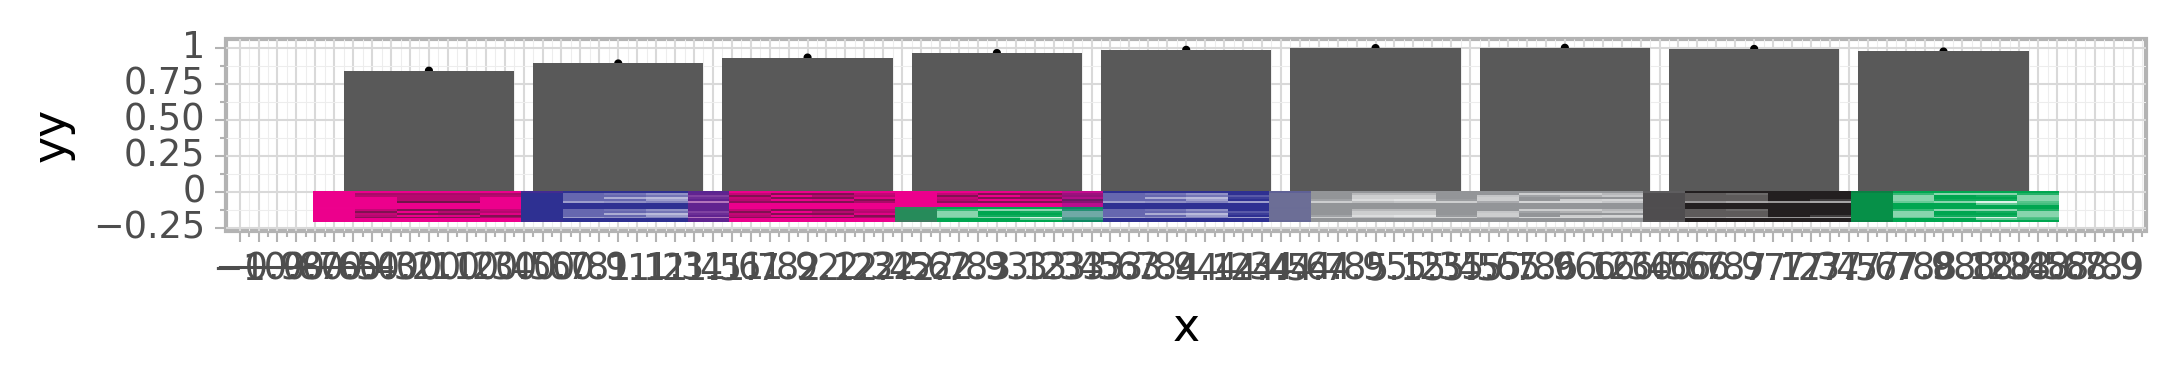

<ggplot: (-9223363305217123254)>

In [96]:
g=(ggplot(data=df,mapping=aes(x='x', y='yy'))
+ geom_point(size=0.1)+geom_bar(stat='identity')+scale_x_continuous(breaks=np.arange(-1,11,0.1))
+ geom_seq_x(seqimg=s.img,x=df.x,y=df.yy,aspect_ratio=0.1,ymin=0)
+ theme_light()+pn.theme(aspect_ratio=0.1,dpi=300,plot_margin=0))
g

In [41]:
g.save('tmp/test.png')

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: tmp/test.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [69]:
from plotnine.utils import resolution
from plotnine.doctools import document

In [75]:
from plotnine.geoms.geom_tile import geom_tile





In [14]:
import matplotlib.image as mpimg
import io
import matplotlib.pyplot as plt


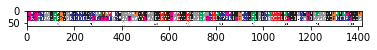

In [15]:
d=mpimg.imread(io.BytesIO(s.img))
plt.imshow(d)

In [16]:
d.shape

(64, 1416, 4)

In [17]:
from matplotlib.colors import to_hex

In [18]:
pict=pd.DataFrame([(i[1],-i[0],to_hex(d[i])) for i in np.ndindex(d.shape[0],d.shape[1])],columns=['x','y','c'])

In [36]:
pict

,x,y,c
0,0,0,#ffffff
1,1,0,#ffffff
2,2,0,#ffffff
3,3,0,#ffffff
4,4,0,#ffffff
...,...,...,...
90619,1411,-63,#ffffff
90620,1412,-63,#ffffff
90621,1413,-63,#ffffff
90622,1414,-63,#ffffff


In [30]:
data.y.max()-data.y.min()

0.9999232575641008

In [55]:
dy=(data.y.max()-data.y.min())
f=64./1416.
a=0.2

In [56]:
dh=dy*f/(a-f)

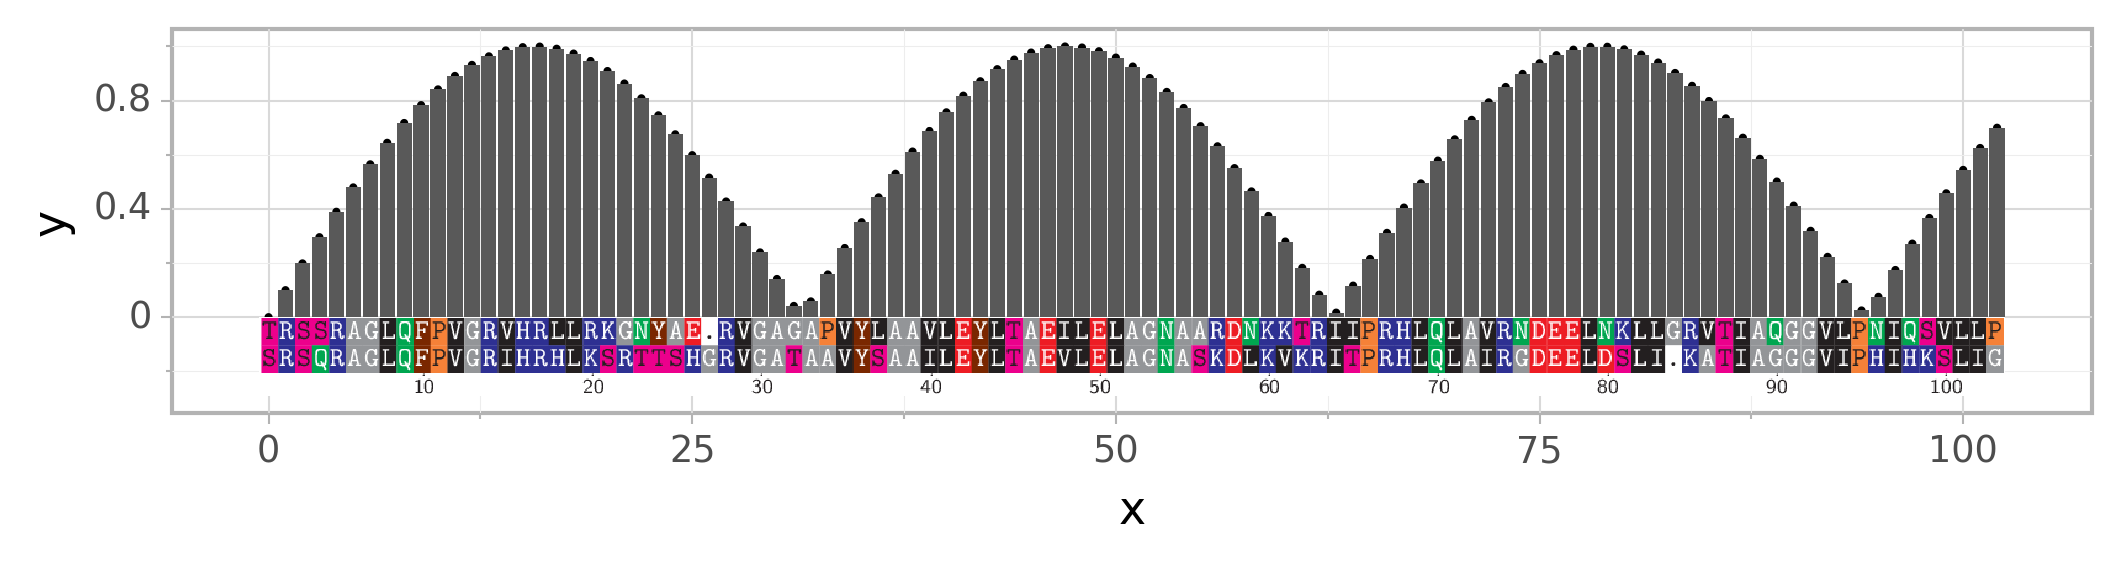

<ggplot: (8730006475240)>

In [93]:
(ggplot(data=df,mapping=aes(x='x', y='y'))
+ geom_point(size=0.1)+geom_bar(stat='identity')#+scale_x_continuous(limits=(-0.5,102.5),expand=(0,0))
 #+scale_y_continuous(expand=(0,0))
+ geom_tile(data=pict,mapping=aes(x='x*103./1416.-0.5', y='y/64.*dh'),fill=pict['c'])
+ theme_light()+pn.theme(aspect_ratio=a,dpi=300,plot_margin=0))